In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets\FuelConsumption_file.csv')

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\imoce\AppData\Local\Temp\ipykernel_16948\3896884189.py:1: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv('datasets\FuelConsumption_file.csv')


In [3]:
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

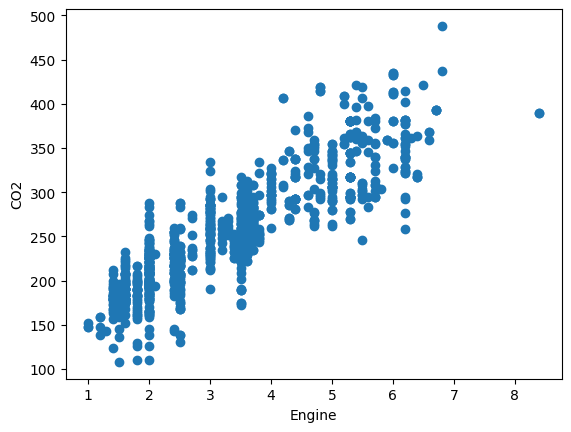

In [8]:
data = df[['ENGINESIZE','CO2EMISSIONS']]

plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
plt.xlabel('Engine')
plt.ylabel('CO2')
plt.show()

In [9]:
data.corr()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [11]:
X = df['ENGINESIZE'].values.reshape(-1,1)

In [12]:
y = df['CO2EMISSIONS'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
print ('coefficients : ',lr.coef_)
print ('Intercept : ',lr.intercept_)

coefficients :  [39.05945302]
Intercept :  125.61677903740474


<Axes: >

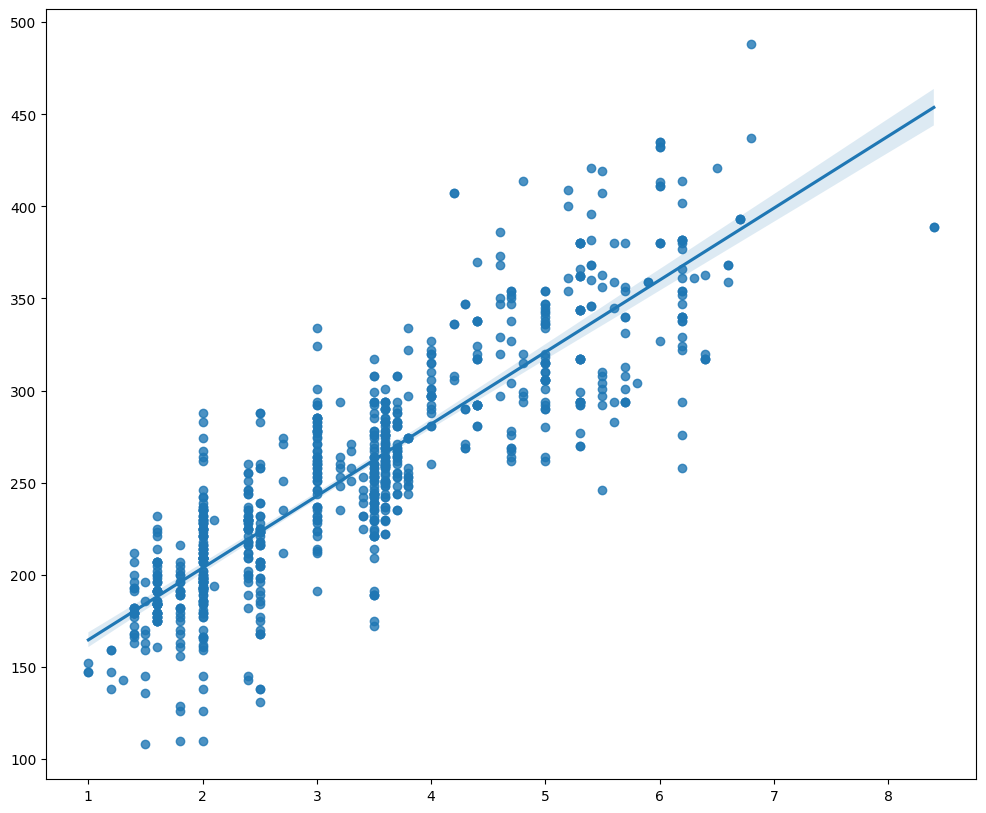

In [17]:
plt.figure(figsize=(12, 10))
sns.regplot(x=X_train, y=y_train)

Predikcija za motor veličine 3.5 cc

In [18]:
lr.predict(np.array([3.5]).reshape(1,-1))

array([262.32486461])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [21]:
print('Mean absolute error: %.2f ' % mean_absolute_error(y_test, y_test_pred))
print('Mean sum of squares (MSE): %.2f ' % mean_squared_error(y_test, y_test_pred))
print('R2-score: %.2f' % r2_score(y_test, y_test_pred) )

Mean absolute error: 22.42 
Mean sum of squares (MSE): 877.58 
R2-score: 0.78
